# Part 1: Modeling Challenge

In [1]:
# Importing required packages and libraries

import pandas as pd #Importing pandas package required for data munging and manipulation
import numpy as np #Importing numpy package to support and work with large datasets and matrices 
import seaborn as sns #Importing seaborn package that is useful for EDA and visualizations
import matplotlib.pyplot as plt #Importing matplotlib package useful for visualizing multiple columns and large volume datasets
from tabulate import tabulate #Importing tabulate package that helps display tabular data in an organized format
import random #Importing package that helps generate pseudo random numbers
from sklearn.model_selection import train_test_split #Importing sklearn package to split dataset into train and test set
from sklearn.preprocessing import StandardScaler #Importing sklearn package used to scale our data
from sklearn.neighbors import KNeighborsClassifier #Importing sklearn package to implement KNN classifier.
from sklearn.tree import DecisionTreeClassifier #Importing sklearn package to implement the Decision Tree classifier
from sklearn.metrics import classification_report, confusion_matrix #Importing sklearn package to view prediction metrics

In [2]:
# Reading in the dataset without any headers
data = pd.read_csv("breast-cancer.csv", header=None)

# Reading in just the headers for each column
headers = pd.read_csv("field_names.txt", sep=" ", header=None)


In [3]:
# Combinning the headers with its relevant column 
data.columns = headers.to_numpy().flatten()

In [4]:
# Preview of the dataset to check if everything is in order
data.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# We can use the .info() command to view the datatype of each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                            569 non-null int64
diagnosis                     569 non-null object
radius_mean                   569 non-null float64
radius_sd_error               569 non-null float64
radius_worst                  569 non-null float64
texture_mean                  569 non-null float64
texture_sd_error              569 non-null float64
texture_worst                 569 non-null float64
perimeter_mean                569 non-null float64
perimeter_sd_error            569 non-null float64
perimeter_worst               569 non-null float64
area_mean                     569 non-null float64
area_sd_error                 569 non-null float64
area_worst                    569 non-null float64
smoothness_mean               569 non-null float64
smoothness_sd_error           569 non-null float64
smoothness_worst              569 non-null float64
compactness_mean              5

In order to decide whether our dataset requires any transormation or scaling, we would go ahead and visualize distributions to understand the general spread and distribution of each variable

NOTE- We would be removing the two columns 'ID' and 'diagnosis' from our EDA for the time being considering the ID is just identifier (integer type) while the latter is our categorical target variable (object type)

In order to use our target variable in our algorithm, we would need to encode this categorical variable into an ordinal variable. 

In this case, our categorical variable is dichotomous so it would be ideal to express a malignant outcome as 1 and a benign outcome as 0


In [6]:
data["diagnosis"] = np.where(data["diagnosis"].str.contains("M"), 1, 0)

In [8]:
# We can print our encoded target variable and observe that Benign = 0 & Malignant = 1
data["diagnosis"].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In order to decide whether our dataset requires any transormation or scaling, we would go ahead and visualize distributions to understand the general spread and distribution of each variable

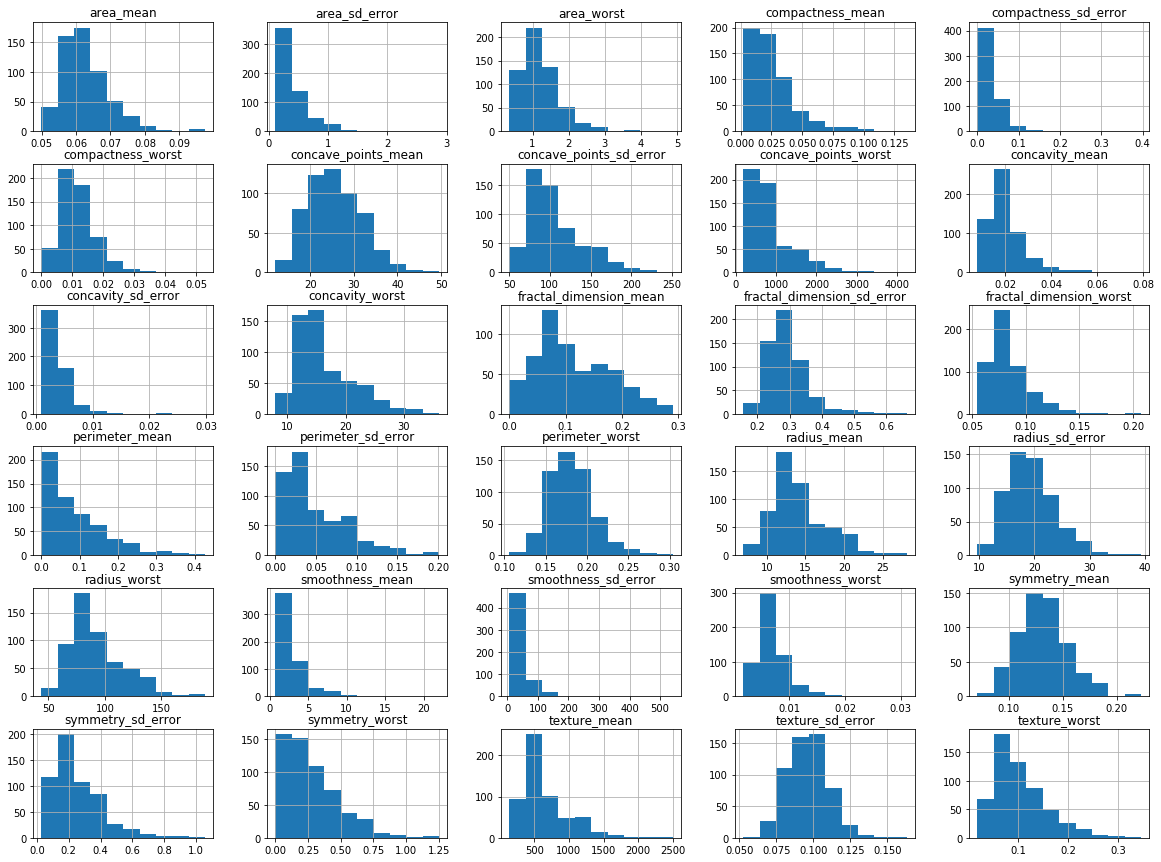

In [9]:
eda_data = data.iloc[:,2:]
data = data.iloc[:,1:]
eda_data_keys = eda_data.keys()

distributions = eda_data.hist(figsize=(20, 15))

As we can observe in the above plots, the features do not have a consistent spread and we can clearly see some features having different distributions. Considering a high possibility that we would be implementing classification distance based algorithms, it is extremely important to make sure that each column is scaled properly so that each feature can be comparable to each other.

As we eventually split our dataset into testing and training, I would go ahead and either use the MinMacScaler transform if I want to normalize my features or the StandardScaler transform if I decide to standardize them instead.

In [10]:
print("Total number of data points: ", (data.shape[0])) #Print the total number of data points
print("Total number of features & attributes: ", (data.shape[1])) # Printing the total number of features
print("List of all features & attributes: ", data.columns) # Printing a list of all features in the dataset 

Total number of data points:  569
Total number of features & attributes:  31
List of all features & attributes:  Index(['diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst',
       'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean',
       'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error',
       'area_worst', 'smoothness_mean', 'smoothness_sd_error',
       'smoothness_worst', 'compactness_mean', 'compactness_sd_error',
       'compactness_worst', 'concavity_mean', 'concavity_sd_error',
       'concavity_worst', 'concave_points_mean', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error',
       'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error', 'fractal_dimension_worst'],
      dtype='object')


# Comparing mean and median smoothness and compactness for benign and malignant tumors

In [12]:
compactness = data.groupby('diagnosis')["compactness_mean"].agg([np.mean, np.median])
print(compactness)


               mean   median
diagnosis                   
0          0.021438  0.01631
1          0.032281  0.02859


In [14]:
smoothness = data.groupby('diagnosis')["smoothness_mean"].agg([np.mean, np.median])
print(smoothness)

               mean  median
diagnosis                  
0          2.000321  1.8510
1          4.323929  3.6795


We can observe that the compactness mean and median is 52% and 75% higher respectively for benign tumors  malignant tumors. 

On the other hand, if we look at the smoothness mean and median we see a higher increase of 115% and a 98% respectively for benign and malignant tumors. 

# Creating function to generate bootstrap samples for the dataset

In [15]:
def generate_bootstrap(df, n):
    sample = data.sample(n=n,replace=True)
    return sample

In [16]:
#Testing the generate_bootstrap function
generate_bootstrap(data, 4)

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
544,0,13.87,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,0.1620,...,15.05,24.75,99.17,688.6,0.1264,0.2037,0.13770,0.06845,0.2249,0.08492
72,1,17.20,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.07944,0.1927,...,23.32,33.82,151.60,1681.0,0.1585,0.7394,0.65660,0.18990,0.3313,0.13390
458,0,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291
362,0,12.76,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,0.1759,...,13.75,25.99,87.82,579.7,0.1298,0.1839,0.12550,0.08312,0.2744,0.07238


# Exploratory Data Analysis

Before trying to understand which features are highly predictive to the diagnosis, it would be a good idea to explore the counts and distributions of the different events within our outcome variable.

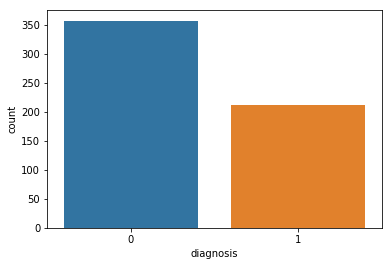

In [17]:
sns.countplot(x='diagnosis',data=data)

We can notice about 350 benign and 200 malignant diagnosis in total. This is a positive sign since it indicates that our dataset does have a fair sample of each outcome.  

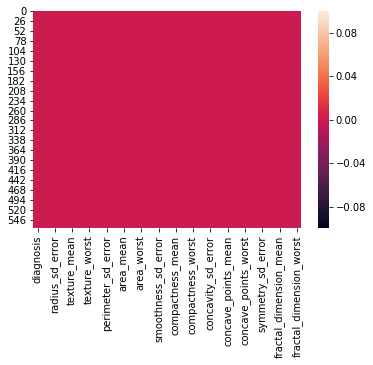

In [18]:
# We can create a heatmap to identify which features contain null or NaN values
sns.heatmap(data.isnull())

This heatmap shows that there is no missing data.

In case of missing values, we could ideally have used the following command to point out which rows and columns misses information- 

np.where(pd.isnull(data))


In cases where we have a smaller dimensional dataset, we could also use the following command to dig deeper into missing cells-

pd.isna(data)

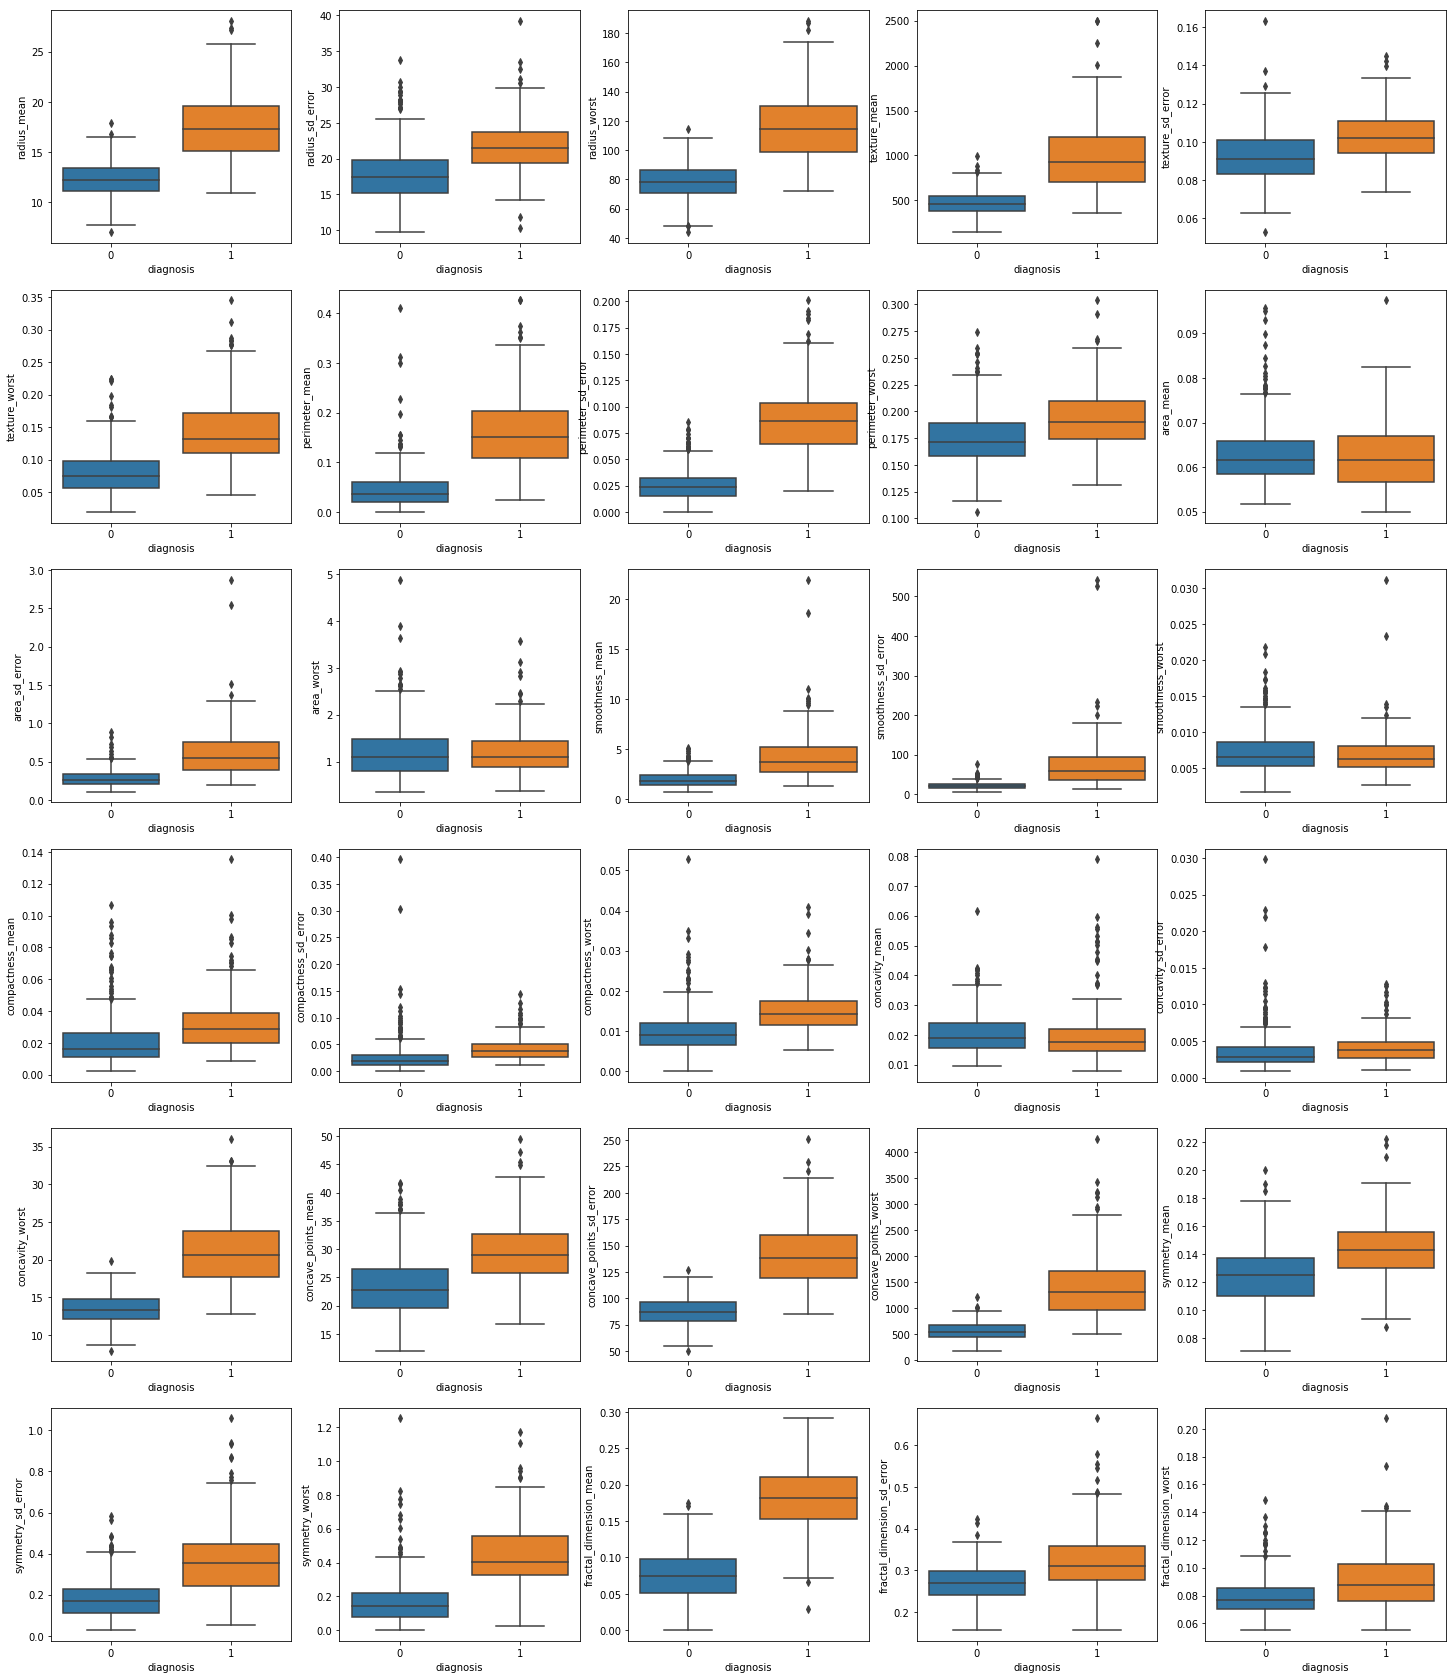

In [19]:
plt.figure(figsize = (25,30))
for x, var in enumerate(eda_data_keys):
    plt.subplot(6, 5, x+1)
    sns.boxplot(x = 'diagnosis', y = var, data = data)

Via the above boxplots, it is safe to assume that the majority of features have higher median values. 
We can observe noticeable differences in the medians of 'perimeter_sd_error', 'perimeter_mean', 'fractal_dimension_mean', 'symmetry_worst' & 'concave_points_sd_error'
These could potentially be the features that are highly predictive of a malignant tumor.

Before any conclusions, it would also be interesting to observe the following- 
1) Correlation among variables
2) Correlation of each variable with the target variable 

Correlation Heatmap


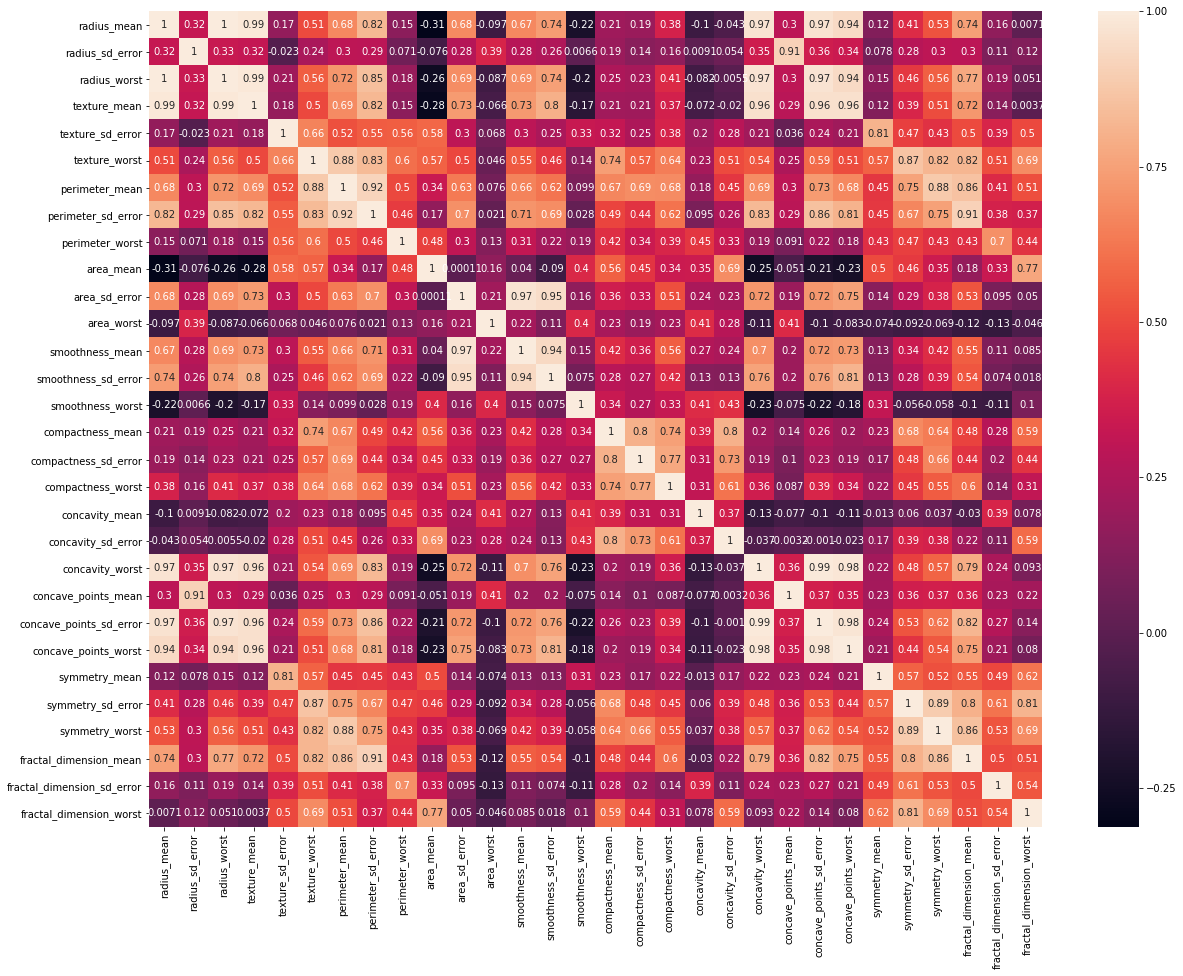

In [20]:
# We can create a correlation heatmap to observe the relation between each variable
correlation = eda_data.corr()
print("Correlation Heatmap")
plt.figure(figsize=(20,15))
sns.heatmap(correlation, annot=True)
plt.show()

This heatmap above helps us to identify variables that are highly correlated to each other. These have high variance leading to higher redundancy in our dataset and should be removed for further EDA

As a next step, we would like to know how each feature relates to our outcome variable.
Considering our target variable is dichotomous (two outcomes), we would need to find the Pearsons correlation score for each feature

In [21]:
cor = data.corr()
correlation = abs(cor["diagnosis"])
correlation = correlation.sort_values(ascending=False)[1:]
correlation.head()

fractal_dimension_mean     0.793566
concave_points_sd_error    0.782914
perimeter_sd_error         0.776614
concavity_worst            0.776454
radius_worst               0.742636
Name: diagnosis, dtype: float64

Based off on the boxplots and our correlations test, we can conclude that the fractal_dimension_mean, concave_points_sd_error & the perimeter_sd_error are three features that are highly predictive of the final diagnosis.

# K-Nearest Neighbors 

The first classification algorithm I would be implementmenting is the K Nearest Neighbors algorithm. It makes predictions based upon closest data points. It involves comparing features for the new instance with the features from the instances and diagnosis we have already collected.

This algorithm is also widely used in the medical industry especially to detect and diagnose diseases based off on past patients experiencing similiar symptoms. 

Advantages-<br> 
       1) Easy to understand and explain<br>
       2) Model training is really fast<br>
       3) Does a good job in situations where there is a complex relationship between the feature and the outcome.<br>
       4) Flexibility in choosing the number of neighbors we want (Depending on how generalizable we need the model to be)<br>
       <br>
Disadvantages- <br>
       1) Comparatively slower in making predictions (depends on what distance metric is used)<br> 
       2) Not practical in situations where one has a lot of features<br>
       3) Does not work well compared to other algorithms with less and insufficient data<br>

In [22]:
X = data.loc[:, data.columns != 'diagnosis']
y = data.iloc[:,0]

In [23]:
# Splitting dataset into test (75%) & train (25%) 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
classifier = KNeighborsClassifier(n_neighbors = 15)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [26]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(y_pred)

[[80  0]
 [ 5 58]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        80
           1       1.00      0.92      0.96        63

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

[0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0
 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0]


In [27]:
error = []
# Calculate errors for different k values from say 1 to 20
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

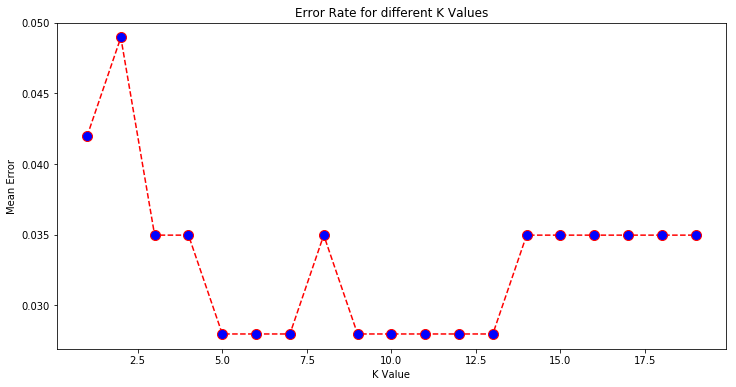

In [28]:
plt.figure(figsize = (12,6))
plt.plot(range(1,20), error, color = 'red', linestyle = 'dashed', marker ='o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate for different K Values')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

This graph tells us that the optimum number of neighbors for our model would be between 5 to 7 and 9 to 14 which would have minimal mean errors
Let us try and fit one of this value for 'k' and see our results-

In [29]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(y_pred)

[[80  0]
 [ 4 59]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        80
           1       1.00      0.94      0.97        63

    accuracy                           0.97       143
   macro avg       0.98      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0
 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0]


Overfitting implies that our model is performing well on the training data but has weak predictive power with new data coming in. 

If we are looking at the KNN algorithm, when I refit my model, I got a 100% accuracy. There is a high chance this accuracy might sink if I introduce new data. This is because I chose a small value for the number of neighbors (k) and that highly compromises the generalizability of the model. On the other hand, if I choose a much larger value for k, these multiple neighbors would no longer hold the same predictive power. The correct value for k is usually found using k-fold cross validation.

# Decision Tree Classifier

In [30]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
predictions = dtree.predict(X_test)

In [32]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        80
           1       0.92      0.92      0.92        63

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143

[[75  5]
 [ 5 58]]


In [ ]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydot

In [ ]:
features = list(data.columns[1:])

In [ ]:
dot_data = StringIO()

In [ ]:
export_graphviz(dtree, out_file = dot_data, feature_names = eda_data.columns, filled = True, rounded = True)

In [ ]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())

In [ ]:
Image(graph[0].create_png())

As we can see in the classification report above, decision tree is an apt model to use for this situation. We basically start with the splitting point which in this case can be assumed as a highly predictive variable. We then split on every possible value of the outcome variable such that they split into two groups based on whether they are above or below that value. 
We examine the purity from splitting that point which helps us choose the variable and value for that variable that gives us the best change in purity measure. 

We then keep repeating this splitting process and keep explaining the exceptions until we reach a stopping point. 
In some cases, the tree becomes really deep which could deeply affect the generalizability of the model hence making it prone to overfitting. We can avoid this by using pruning techniques or all together adopt a random forest approach. 

Like every predictive algorithm, decision trees come with their advantages and disadvantages. 

Advantages- <br>
    1) Relationships between outcome and predictorsare clear<br>
    2) Easy to understand what variables are important in making predictions<br>
    3) Can examine non linear relationships between predictors and outcomes<br>
    4) Quick to calculate<br>
    5) Works for both classifications and regression problems.<br>
    
Disadvantages- <br>
    1) It is difficult to find the best tree since we have many hyperparameters to search through<br>
    2) These models are highly prone to overfitting<br>

# Summary

The data set comprised of 569 diagnosis records. A larger sample size would definitely help improve the predictive power of the classification models. Given more time, I would have liked to explore the outliers present in a lot of datapoints which were diagnosed as benign. It would also definitely have been interesting to explore other classification algorithms such as Support Vector Machines, Naive Bayes & Random Forests. 

It would also have been extremely helpful to conduct a literature review before my EDA process to try and understand past research, objectives, methodologies and results. Considering my background is in analytics and this use case is within the biomed research field, prior research would definitely have helped my approach and thought direction. 





The main purpose of this study was to try and understand which features are highly predict a malignant diagnosis and also implement some models to try and predict what the final diagnosis is. 

Through some exploratory data analysis I was able to identify that the fractal_dimension_mean, concave_points_sd_error & the perimeter_sd_error are three features that are highly predictive of the final diagnosis. 

I was also able to implement a distance based KNN model and a decision tree model which have an accuracy of 97% and 93% respectively. 

By looking at these numbers we could say that the KNN model is better. 

However in such circumstances, we have to look at the use-case and understand what we are trying to achieve.
We are dealing with data where we are trying to predict whether a diagnosis is benign or malignant. It is imperical in such a situation that we minimize our False Negative and False Positives. In simpler words, we do not want to incorrectly predict a malignant diagnosis and flag it as a benign one. 

Taking this into account as well, we could conclude that the KNN model is a great choice for this dataset and in general for such use cases where it would help looking up at similar and past data and trying to make an 'educated' guess as to what the diagnosis is.


# Part 2- Sample Student Submissions


# Sample 1

1) cross_val_score is imported from the sklearn.model_selection package and not a sklearn.cross_validation package.<br>
2) We import LinearRegression from sklearn.linear_model and not just sklearn.<br>
3) It is a good practice to give your dataframe a small name and not just 'd' as it could get mixed up later.<br>
4) It is a good practice to initially set up your working directory to the path where your files are located so you don't have to enter the whole path whenever you want to load anything.<br>
5) train_test_split is imported from the sklearn.model_selection package and not a sklearn.cross_validation package.<br>
6) Check the parameters and their order when trying to calculate the cross_val_score.<br>
7) Need to review cross validation & model fitting concepts. <br>
7) Avoid using 'x1' and 'x2' when setting up your data. X and y are good general conventions.<br>
8) You do not need to print the mean in the last line of the code.<br>
<br>
Other comments- <br>
Its a good practice to write all the import commands in the first chunk of your code. The comments could be more clear and <br> informative as that would help the student and the reviewer. 

# Sample 2

1) cross_val_score is imported from the sklearn.model_selection package and not a sklearn.cross_validation package.<br>
2) It is a good practice to initially set up your working directory to the path where your files are located so you don't <br>
have to enter the whole path whenever you want to load anything.<br>
3) train and testing sets split?<br>
8) You do not need to print the mean in the last line of the code.<br>
<br>
Other comments- <br>
The comments could be more clear and informative as that would help the student and the reviewer. Otherwise decent job with coding conventions. <br>
